# Calculate the crack width along the crack line in a concrete beam member from a scanned crack image

In [2]:
# %matplotlib inline
import numpy as np
import matplotlib.pylab as plt


In [3]:
dat = plt.imread('crack_grey16_9600dpi_B_W.jpg')

In [4]:
pix_size = 1/9600.*25.4  # 9600 dot per inch
print('resolution (mm_per_pixl)', pix_size)
print(np.array(dat.shape)* pix_size) # mm, 9600 dpi

resolution (mm_per_pixl) 0.0026458333333333334
[78.0811875   6.06689583]


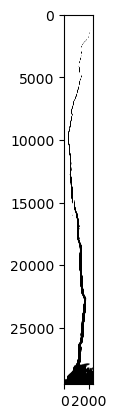

In [5]:
image = dat.copy()
wall_mask = image > 120 # more than 120 is white
image[wall_mask] = 255

crack_mask = image <= 120
image[crack_mask] = 0

plt.imshow(image,cmap='gray')
plt.axis('on')
plt.show()

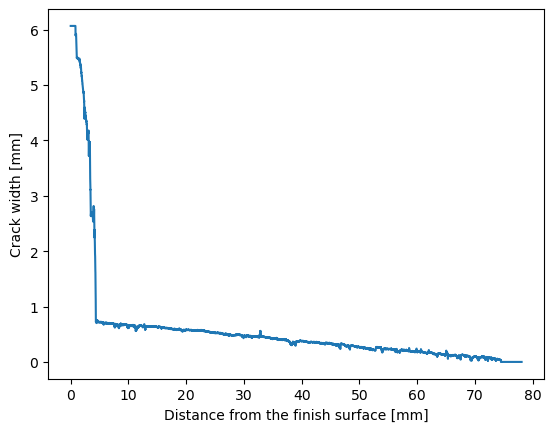

In [6]:
coord = np.arange(0,image.shape[0]*pix_size,pix_size) # mm, 0 from the open surface

cr_pix_count = np.array( [row[row==0].size for row in image] )
crack_width = (cr_pix_count * pix_size)[::-1] # mm
plt.plot(coord,crack_width,'-')
plt.xlabel('Distance from the finish surface [mm]')
plt.ylabel('Crack width [mm]')
plt.show()




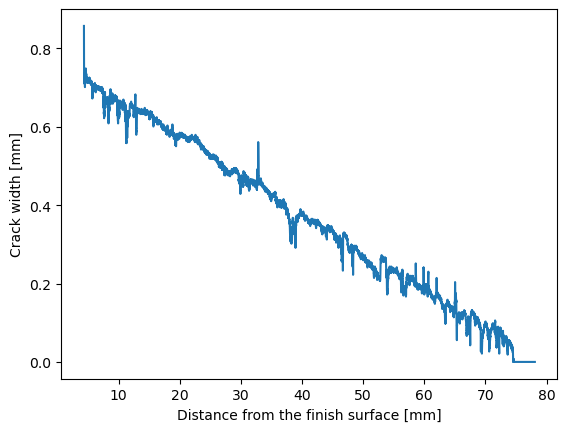

In [7]:
# ignore large voids (>1mm) near the crack open surface
crack_width1= crack_width.copy()
crack_width1[crack_width1>1] = np.nan

plt.plot(coord,crack_width1,'-')
plt.xlabel('Distance from the finish surface [mm]')
plt.ylabel('Crack width [mm]')

plt.show()



In [8]:
from scipy.optimize import curve_fit
def crack_line(x,k,b):
    """
    returns the crack width along the x axis
    """
    y = x * k + b
    return y

# not nan in crack width, and not zero in crack width
x = coord[(~np.isnan(crack_width1)) & (crack_width1 != 0)]
y = crack_width1[(~np.isnan(crack_width1)) & (crack_width1 != 0)]

popt,pcov = curve_fit(crack_line,x,y,p0=[0,0])  # popt is the fitted (k, b)



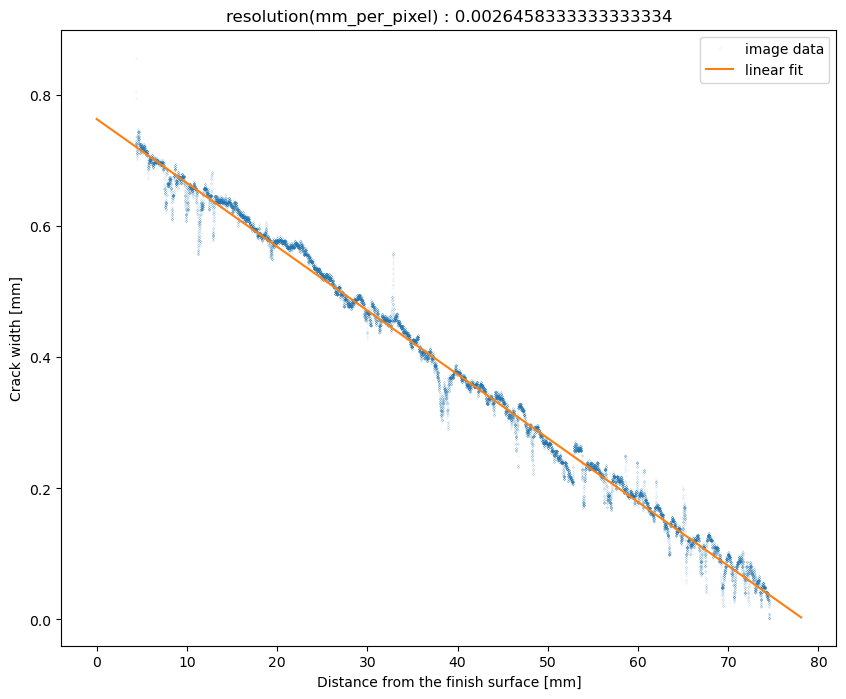

fit equation: y = -0.009741533777078914 x + 0.7636847762897205


In [9]:
plt.figure(figsize=(10,8))
plt.plot(x,y,'.',markersize=0.1, label = 'image data')
x_plot = np.linspace(0, np.array(dat.shape)[0]* pix_size, 100)
plt.plot(x_plot,crack_line(x_plot, *popt), label='linear fit')  # *popt: unpack popt:  crack_line(x_plot, popt[0], popt[1])
plt.xlabel('Distance from the finish surface [mm]')
plt.ylabel('Crack width [mm]')
plt.title(f'resolution(mm_per_pixel) : {pix_size}')
plt.legend()
plt.show()
print(f'fit equation: y = {popt[0]} x + {popt[1]}')


In [10]:
print("crack width on the surface[mm]: ", crack_line(0, *popt))

crack width on the surface[mm]:  0.7636847762897205
